# SUPPORT VECTOR MACHINE

Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.

In [60]:
import pandas as pd

df = pd.read_csv('mushroom.csv')
df[df['Unnamed: 0'] == 1]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
602,1,conical,scaly,gray,no,fishy,free,close,broad,pink,...,universal,brown,none,pendant,black,abundant,waste,edible,13.802729,4.730802
1960,1,conical,scaly,gray,no,fishy,free,close,broad,pink,...,universal,brown,none,pendant,black,abundant,waste,edible,13.802729,4.730802


In [61]:
df.shape

(2000, 26)

In [62]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [63]:
df.rename(columns = {'Unnamed: 0':'Ids'},inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ids                       2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [65]:
df.duplicated().sum()

1024

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(976, 26)

In [68]:
df.describe()

,Ids,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


In [69]:
df.isna().sum()

Ids                         0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
num_features = list(df.select_dtypes(include='number').columns)
(num_features)

['Ids', 'stalk_height', 'cap_diameter']

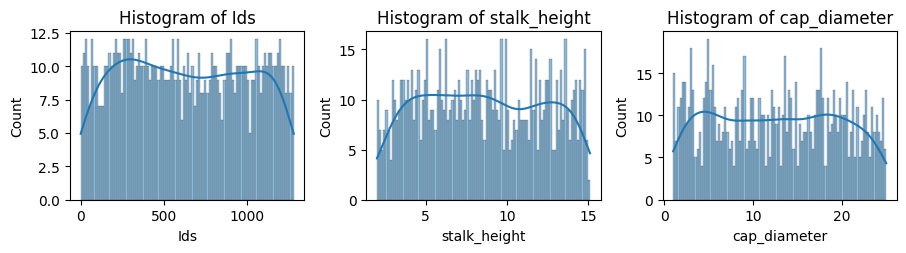

In [72]:
# Histograms 

plt.figure(figsize=(12,9))
for i,col in enumerate(num_features):
    plt.subplot(4,4,i+1)
    plt.title(f'Histogram of {col}')
    sns.histplot(df[col],kde=True,bins=100,fill=True)
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()    


In [73]:
cat_features = df.select_dtypes(include=['object']).columns.to_list()
len(cat_features)

23

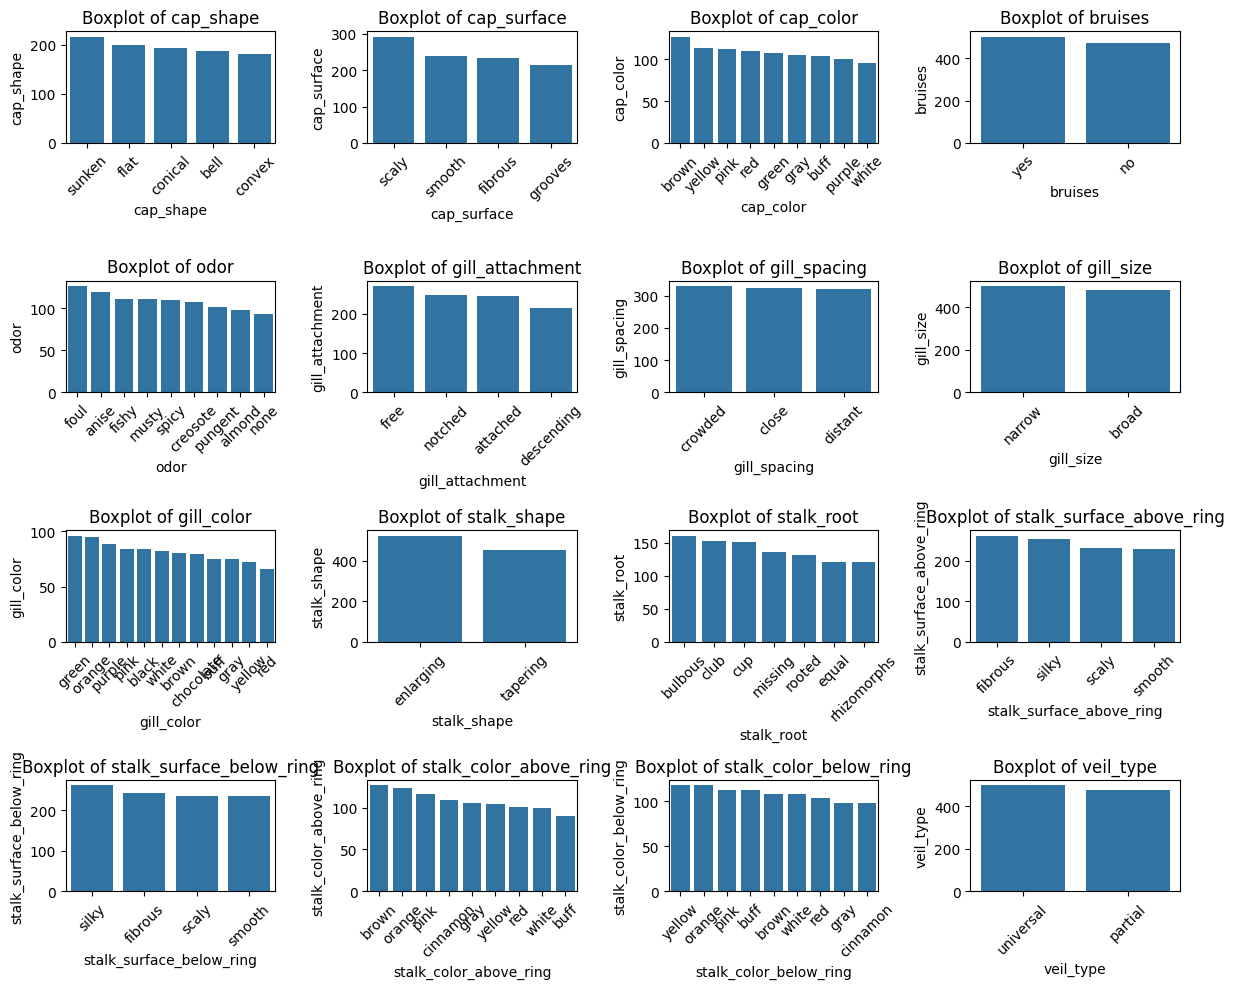

In [74]:
# Box-plots

# Histograms 

plt.figure(figsize=(12,10))
for i,col in enumerate(cat_features[:16]):
    plt.subplot(4,4,i+1)
    plt.title(f'Boxplot of {col}')
    sns.barplot(df[col].value_counts())
    plt.xlabel(f'{col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()    



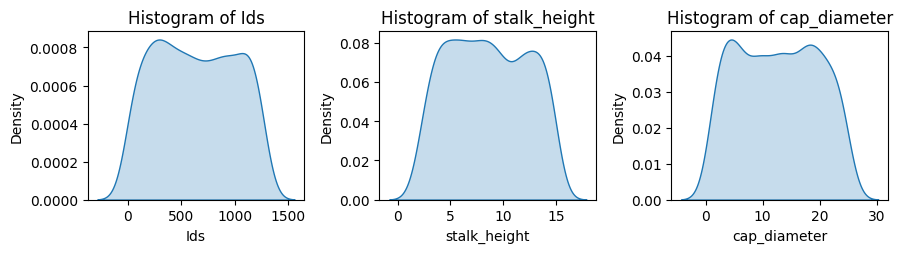

In [75]:
# Density plot 

plt.figure(figsize=(12,9))
for i,col in enumerate(num_features):
    plt.subplot(4,4,i+1)
    plt.title(f'Histogram of {col}')
    sns.kdeplot(df[col],fill=True)
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()    


3.	Investigate feature correlations to discern relationships within the data.

In [76]:
df.corr(numeric_only=True)

,Ids,stalk_height,cap_diameter
Ids,1.000000,0.000815,0.042726
stalk_height,0.000815,1.000000,-0.034891
cap_diameter,0.042726,-0.034891,1.000000


### Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.

In [77]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in cat_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])

2.	Split the dataset into training and testing sets.

In [78]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['class'],axis=1)
Y = df_encoded['class'].values

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

In [79]:
df.dtypes

Ids                           int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

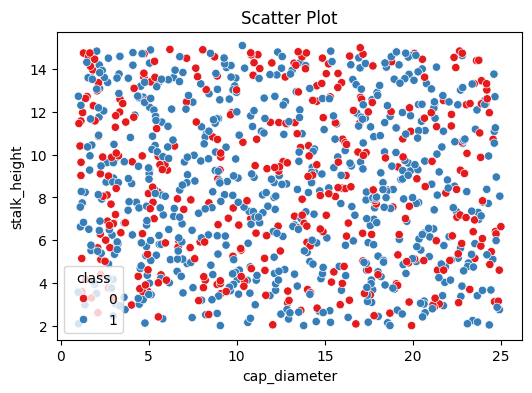

In [80]:
# scatter plot

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_encoded,
    x='cap_diameter',
    y='stalk_height',
    hue='class',
    palette='Set1'
)
plt.title("Scatter Plot")
plt.show()


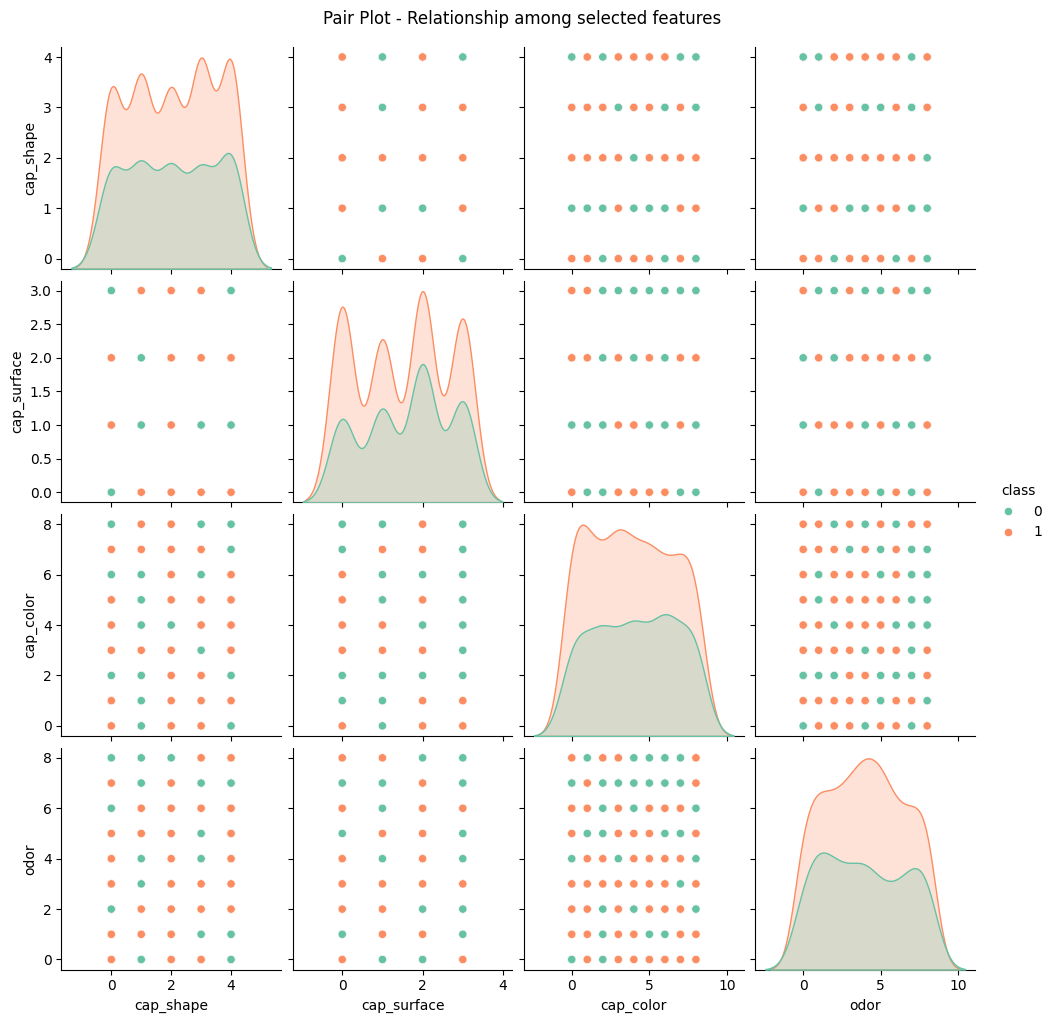

In [81]:
cols = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'odor']

sns.pairplot(df_encoded[cols], hue='class', palette='Set2')
plt.suptitle("Pair Plot - Relationship among selected features", y=1.02)
plt.show()

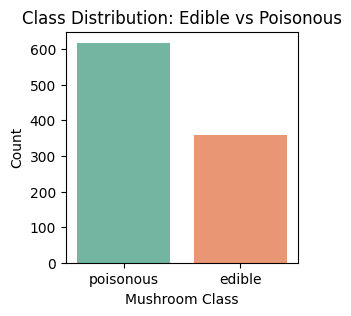

In [82]:
plt.figure(figsize=(3,3))
sns.countplot(x='class', data=df,hue=df['class'], palette='Set2')
plt.title("Class Distribution: Edible vs Poisonous")
plt.xlabel("Mushroom Class")
plt.ylabel("Count")
plt.show()

### Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

In [83]:
from sklearn.svm import SVC

2.	Train the SVM model on the training data.

In [84]:
model = SVC(kernel='linear')
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision_score: ",precision_score(y_test,y_pred))
print("Recall_score: ",recall_score(y_test,y_pred))
print("F1_score: ",f1_score(y_test,y_pred))


Accuracy:  62.755102040816325
Precision_score:  0.6275510204081632
Recall_score:  1.0
F1_score:  0.7711598746081505


### Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


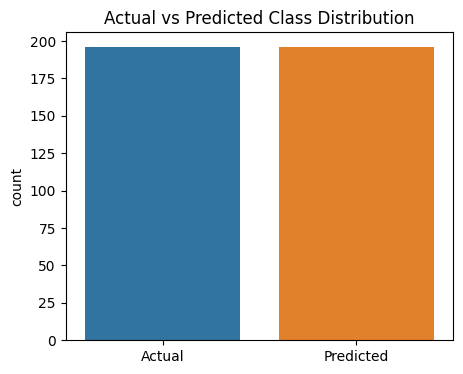

In [86]:
import pandas as pd
results = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

# Plot actual vs predicted classes
plt.figure(figsize=(5,4))
sns.countplot(data=results)
plt.title("Actual vs Predicted Class Distribution")
plt.show()

### Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [88]:
from sklearn.model_selection import GridSearchCV

d = {
    'kernel':['rbf','sigmoid'],
    'C' : [0.1,0.01,10,0.001],
    'gamma' : [0.1,0.01,1,0.001]
}

model = SVC()
gsc = GridSearchCV(model,param_grid=d,cv=5)
gsc.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 0.01, ...], 'gamma': [0.1, 0.01, ...], 'kernel': ['rbf', 'sigmoid']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [92]:
print(f'{gsc.best_params_}')
gsc.best_score_*100

{'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}


63.589743589743584

### Task 7: Comparison and Analysis

#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

Kernel: linear, Accuracy: 0.6276
Kernel: poly, Accuracy: 0.6276
Kernel: rbf, Accuracy: 0.6276


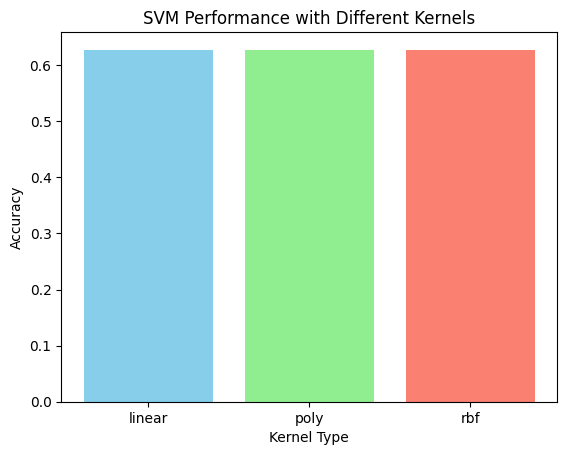

In [89]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")

# Compare visually
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("SVM Performance with Different Kernels")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.show()

#### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**SVM Strengths (for Mushroom Dataset)**
- Achieved high accuracy since the dataset is mostly linearly separable.
- Works well even with many features after label encoding.
- Maximizes class separation with a clear decision boundary between edible and poisonous mushrooms.

**SVM Weaknesses**
- Handles categorical features poorly — encoding may lose natural relationships.
- Hard to interpret which mushroom attributes most influence predictions.
- Performance depends on kernel choice and may degrade if the data is non-linear.

#### 3.	Discuss practical implications of SVM in real-world classification tasks.

**Effective for complex decision boundaries:**
SVMs can classify data that isn’t linearly separable using kernels (e.g., in image recognition, bioinformatics, or text categorization).

**Performs well on smaller, high-dimensional datasets:**
SVMs are powerful when the number of features is large compared to the number of samples — common in fields like medical diagnosis or gene expression analysis.

**Useful where accuracy is critical:**
Because SVMs focus on maximizing the margin between classes, they are often used in fraud detection, spam filtering, and quality control tasks requiring reliable classification.